### Importing Essential libraries and Read the data

In [2]:
# Importing Essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data
data=pd.read_csv("pubg.csv")

In [5]:
# Print the data
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# Domain Analysis

### Data preprocessing

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [10]:
# Categorical column that needs to be encoded (adjust based on your dataset)
categorical_columns = ['matchType']  # Replace with actual categorical columns

In [12]:
# One-Hot Encoding the categorical columns
one_hot = OneHotEncoder()
encoded_features = one_hot.fit_transform(data[categorical_columns]).toarray()

In [13]:
# Add the encoded features back to the dataset and drop original categorical columns
encoded_df = pd.DataFrame(encoded_features, columns=one_hot.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [14]:
# Define feature matrix (X) and target variable (y)
X = data.drop(['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1)  # Adjust based on your dataset
y = data['winPlacePerc']  # Adjust based on your dataset

In [16]:
# Handle missing values if necessary
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [16]:
# study information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Id                          object 
 1   groupId                     object 
 2   matchId                     object 
 3   assists                     int64  
 4   boosts                      int64  
 5   damageDealt                 float64
 6   DBNOs                       int64  
 7   headshotKills               int64  
 8   heals                       int64  
 9   killPlace                   int64  
 10  killPoints                  int64  
 11  kills                       int64  
 12  killStreaks                 int64  
 13  longestKill                 float64
 14  matchDuration               int64  
 15  maxPlace                    int64  
 16  numGroups                   int64  
 17  rankPoints                  int64  
 18  revives                     int64  
 19  rideDistance         

In [9]:
# Check the null element present in dataset or not
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
#Print first five columns of data
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
# Print last five columns of data
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [12]:
# Check duplicate data in dataset
duplicates = data[data.duplicated()].sum()
print(duplicates)

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt        0.0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill        0.0
matchDuration        0
matchType            0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance       0.0
roadKills            0
swimDistance       0.0
teamKills            0
vehicleDestroys      0
walkDistance       0.0
weaponsAcquired      0
winPoints            0
winPlacePerc       0.0
dtype: object


In [13]:
# Describe how many rows and columns present in dataset
data.shape

(4446966, 29)

In [14]:
# describe the mean,max,min value
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# Exploratory Data Analysis

In [16]:
data.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400


In [29]:
# Detect Null value in winPlacrpPerc column
data[data['winPlacePerc'].isnull() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp


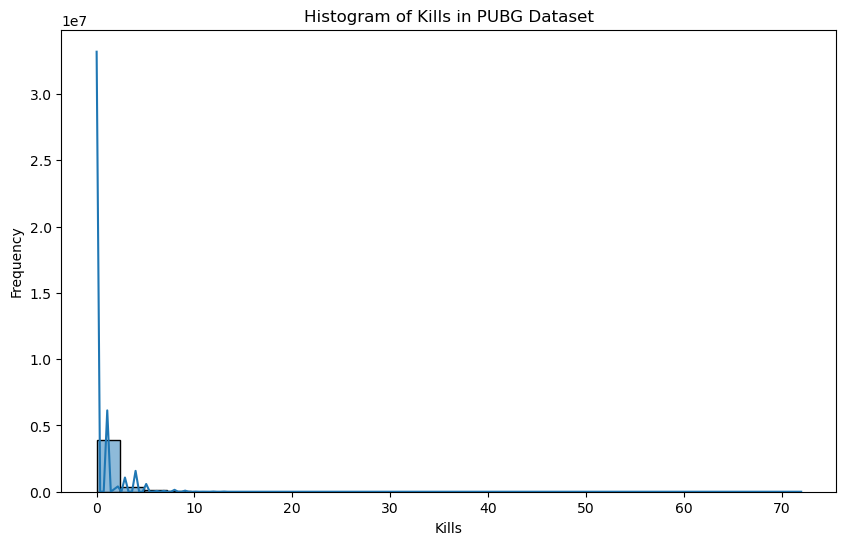

In [31]:
# Hist plot
plt.figure(figsize=(10,6))
sns.histplot(data['kills'], bins=30, kde=True)
plt.title('Histogram of Kills in PUBG Dataset')
plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Discrete Columns
dis_cols_1 = ['assists', 'boosts', 'heals', 'DBNOs', 'headshotKills', 'kills']
dis_cols_2 = ['killStreaks', 'revives', 'roadKills', 'teamKills', 'weaponsAcquired','vehicleDestroys']

def discreteGraph(dis_cols):
    fig = plt.figure(figsize = (20, 15))

    index = 1
    for col in dis_cols:
        plt.subplot(3, 2, index)
        sns.countplot(x=col, data=data1)
        index += 1
    plt.tight_layout()
    plt.show()

In [ ]:
discreteGraph(dis_cols_1)

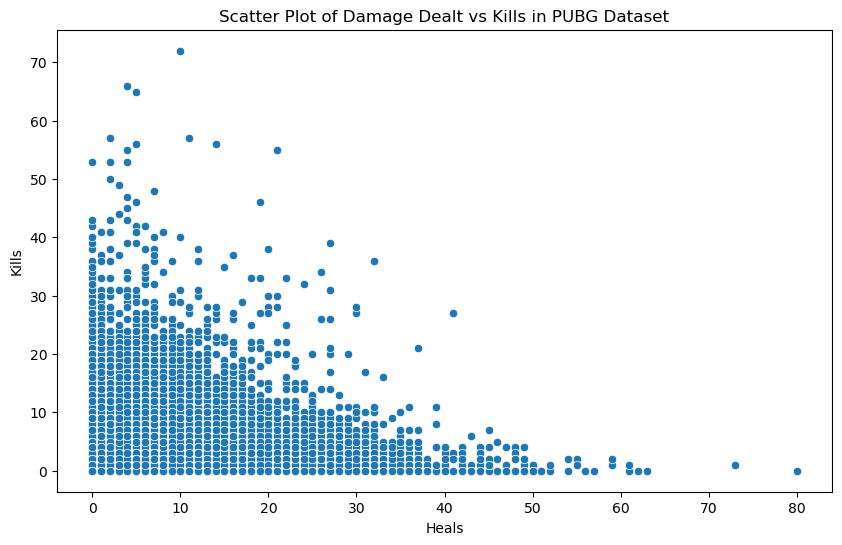

In [33]:
# Scatter plot
data = pd.read_csv('pubg.csv')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['heals'], y=data['kills'])
plt.title('Scatter Plot of Damage Dealt vs Kills in PUBG Dataset')
plt.xlabel('Heals')
plt.ylabel('Kills')
plt.show()

In [ ]:
data["matchType"].value_counts().plot(kind="pie",autopct="%.2f")
#1]Squad-fpp is more value 39.49%
#2]duo-fpp has less than Squad-fpp value 22.41%
#3]squad has less value than duo-fpp 14.09%
#4]solo-fpp has less value than squad 12.07%
#5]duo has less value than solo-fpp 7.05%
#6]solo has less value than duo 4.09
#7] other has small value <1%

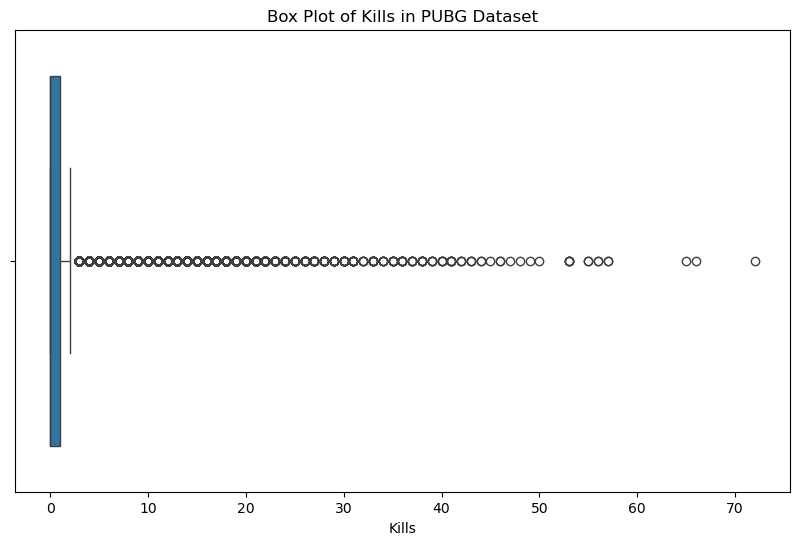

In [35]:
# Checking the outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['kills'])
plt.title('Box Plot of Kills in PUBG Dataset')
plt.xlabel('Kills')
plt.show()

In [41]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile) for the price column
Q1 = data['kills'].quantile(0.25)
Q3 = data['kills'].quantile(0.75)
IQR = Q3 - Q1

In [43]:
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [45]:
data_no_outliers = data[(data['kills'] >= lower_bound) & (data['kills'] <= upper_bound)]

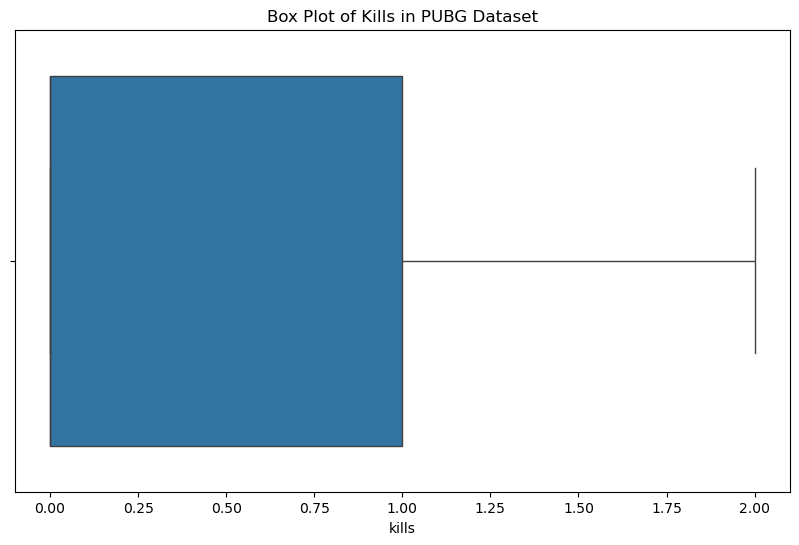

In [47]:
# Box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['kills'])
plt.title('Box Plot of Kills in PUBG Dataset')
plt.xlabel('kills')
plt.show()

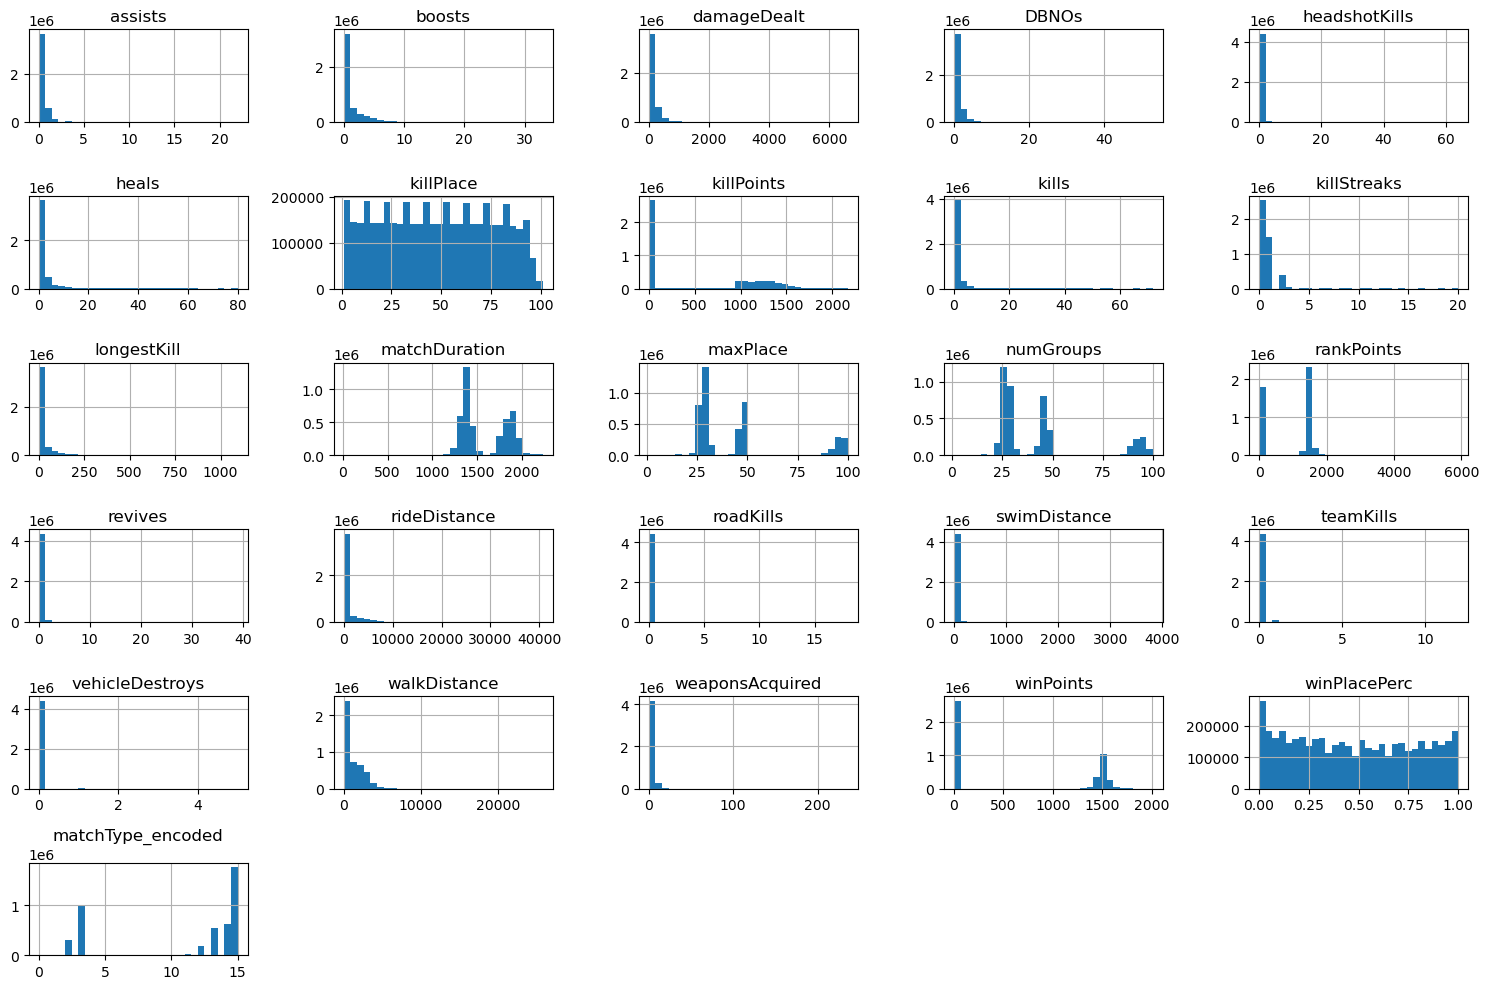

In [16]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

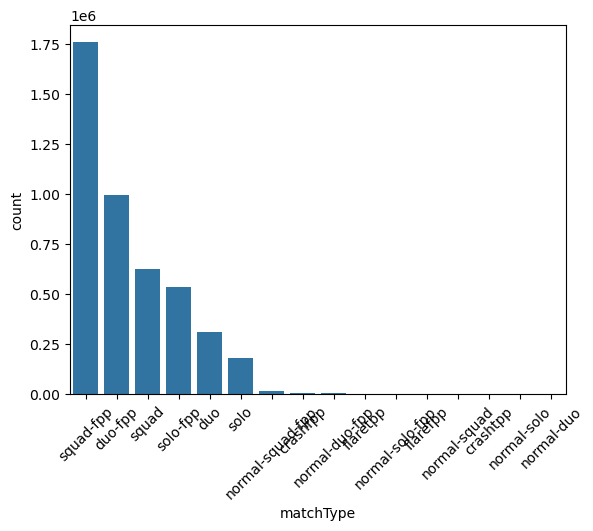

In [18]:
sns.countplot(data=data, x='matchType', order=data['matchType'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

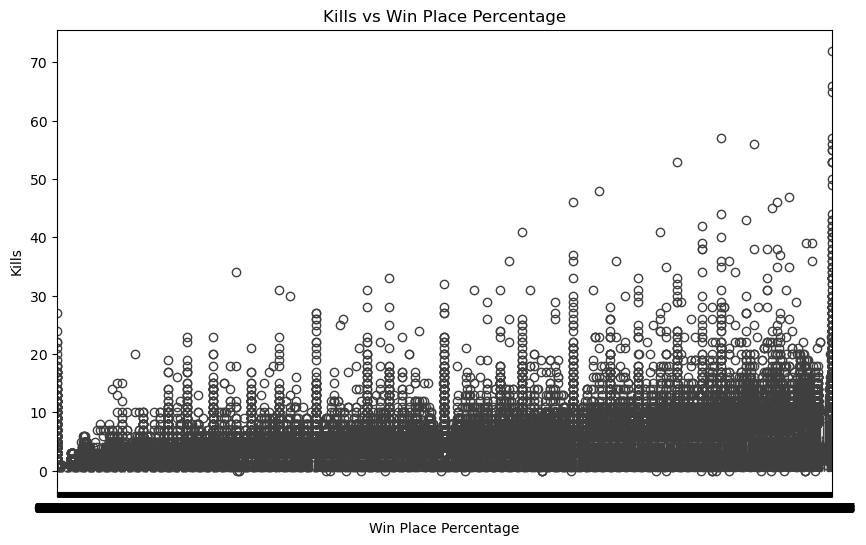

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='winPlacePerc', y='kills', data=data)
plt.title("Kills vs Win Place Percentage")
plt.xlabel("Win Place Percentage")
plt.ylabel("Kills")
plt.show()

C:\Users\Harshada\AppData\Local\Temp\ipykernel_14728\160722960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='matchType', y='kills', data=avg_kills, palette='viridis')


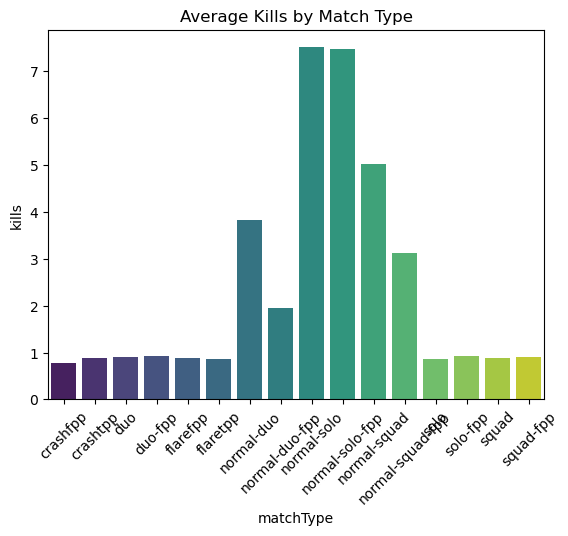

In [20]:
avg_kills = data.groupby('matchType')['kills'].mean().reset_index()
sns.barplot(x='matchType', y='kills', data=avg_kills, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Kills by Match Type')
plt.show()

In [21]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [ ]:
# Create pie charts for each categorical column
num_cols = len(categorical_cols)
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, num_cols * 3))

for ax, col in zip(axes.flatten(), categorical_cols):
    data[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
    ax.set_title(col)
    ax.set_ylabel('')  # Hide y-label

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()   

In [ ]:
avg_kills_by_match_type = data.groupby('matchType')['kills'].mean()
print(avg_kills_by_match_type)

In [ ]:
sns.countplot(x='assists',data=data)

### Feature Selection

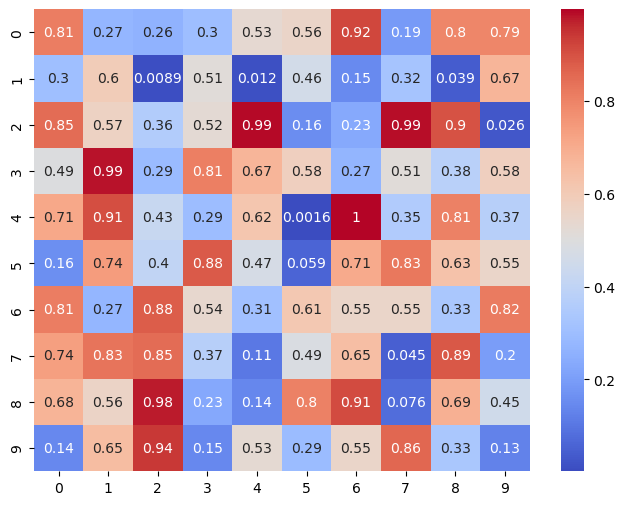

In [49]:
data=np.random.rand(10,10)
plt.figure(figsize=(8,6))
sns.heatmap(data,annot=True,cmap='coolwarm')
plt.show()

# Model Application

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,91.47,0,0,0,57,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,68.00,0,0,0,47,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,32.90,0,0,0,75,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,100.00,0,0,0,45,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4446964,0,4,180.40,1,1,2,11,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446966, dtype: float64

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [39]:
# Define a threshold (e.g., median or mean of the target)
threshold = y_train.median()  # You can also use y_train.mean()

# Convert predictions to binary classes
y_pred_classes = (y_pred >= threshold).astype(int)


In [41]:
from sklearn.metrics import classification_report
# Classification Report
class_report = classification_report((y_test >= threshold).astype(int), y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    665087
           1       0.92      0.90      0.91    669003

    accuracy                           0.91   1334090
   macro avg       0.91      0.91      0.91   1334090
weighted avg       0.91      0.91      0.91   1334090



In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=5, random_state=4)

# Fit the model
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=5, random_state=4)

In [25]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [31]:
# Define a threshold (e.g., median or mean of the target)
threshold = y_train.median()  # or y_train.mean()

# Convert predictions to binary classes
y_pred_classes = (y_pred >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)


In [33]:
class_report = classification_report(y_test_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    665087
           1       0.94      0.94      0.94    669003

    accuracy                           0.94   1334090
   macro avg       0.94      0.94      0.94   1334090
weighted avg       0.94      0.94      0.94   1334090



### Conclusion:

In [ ]:
The Random Forest Classifier gives highest accuracy.